<a href="https://colab.research.google.com/github/Mehrnoushhk/DeepLearning/blob/master/PinAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime

In [4]:
# Reading data
url= 'https://raw.githubusercontent.com/Mehrnoushhk/DeepLearning/master/GBPUSDm30.csv'
data= pd.read_csv(url) 

In [3]:
from DataCleaner import dataCleaner
data= dataCleaner(data)

IndentationError: expected an indented block (DataCleaner.py, line 3)

In [ ]:
#data.to_csv('GBPm30.csv')

In [10]:
# Define Local Maximum
def localMax(data, step):
  isMax= []
  maxValue= []
  for i in range(0, step):
    isMax.append(False)
    maxValue.append(np.nan)
  for i in range(step, data.shape[0]-step):
    tempOptimal= True
    tempValue= data.iloc[i, 1]
    for j in range(1, step+1):
      if (data.iloc[i,1] < data.iloc[i-j,1]) or (data.iloc[i,1] < data.iloc[i+j, 1]):
        tempOptimal= False
        tempValue= np.nan
    isMax.append(tempOptimal)
    maxValue.append(tempValue)
  for i in range(0, step):
    isMax.append(False)
    maxValue.append(np.nan)  
  return isMax, maxValue            


# Define Local Minimum
def localMin(data, step):
  isMin= []
  minValue= []
  for i in range(0, step):
    isMin.append(False)
    minValue.append(np.nan)
  for i in range(step, data.shape[0]-step):
    tempOptimal= True
    tempValue= data.iloc[i, 2]
    for j in range(1, step+1):
      if (data.iloc[i,2] > data.iloc[i-j,2]) or (data.iloc[i,2] > data.iloc[i+j, 2]):
        tempOptimal= False
        tempValue= np.nan
    isMin.append(tempOptimal)
    minValue.append(tempValue)
  for i in range(0, step):
    isMin.append(False)
    minValue.append(np.nan)  
  return isMin, minValue

In [11]:
#%%time
dataMax, dataMaxValue= localMax(data, 4)
dataMin, dataMinValue= localMin(data, 4)

In [12]:
data['isMax']= dataMax
data['maxValue']= dataMaxValue
data['isMin']= dataMin
data['minValue']= dataMinValue

In [13]:
minMax= pd.DataFrame(list(zip(dataMinValue, dataMaxValue)), columns=['min', 'Max'])

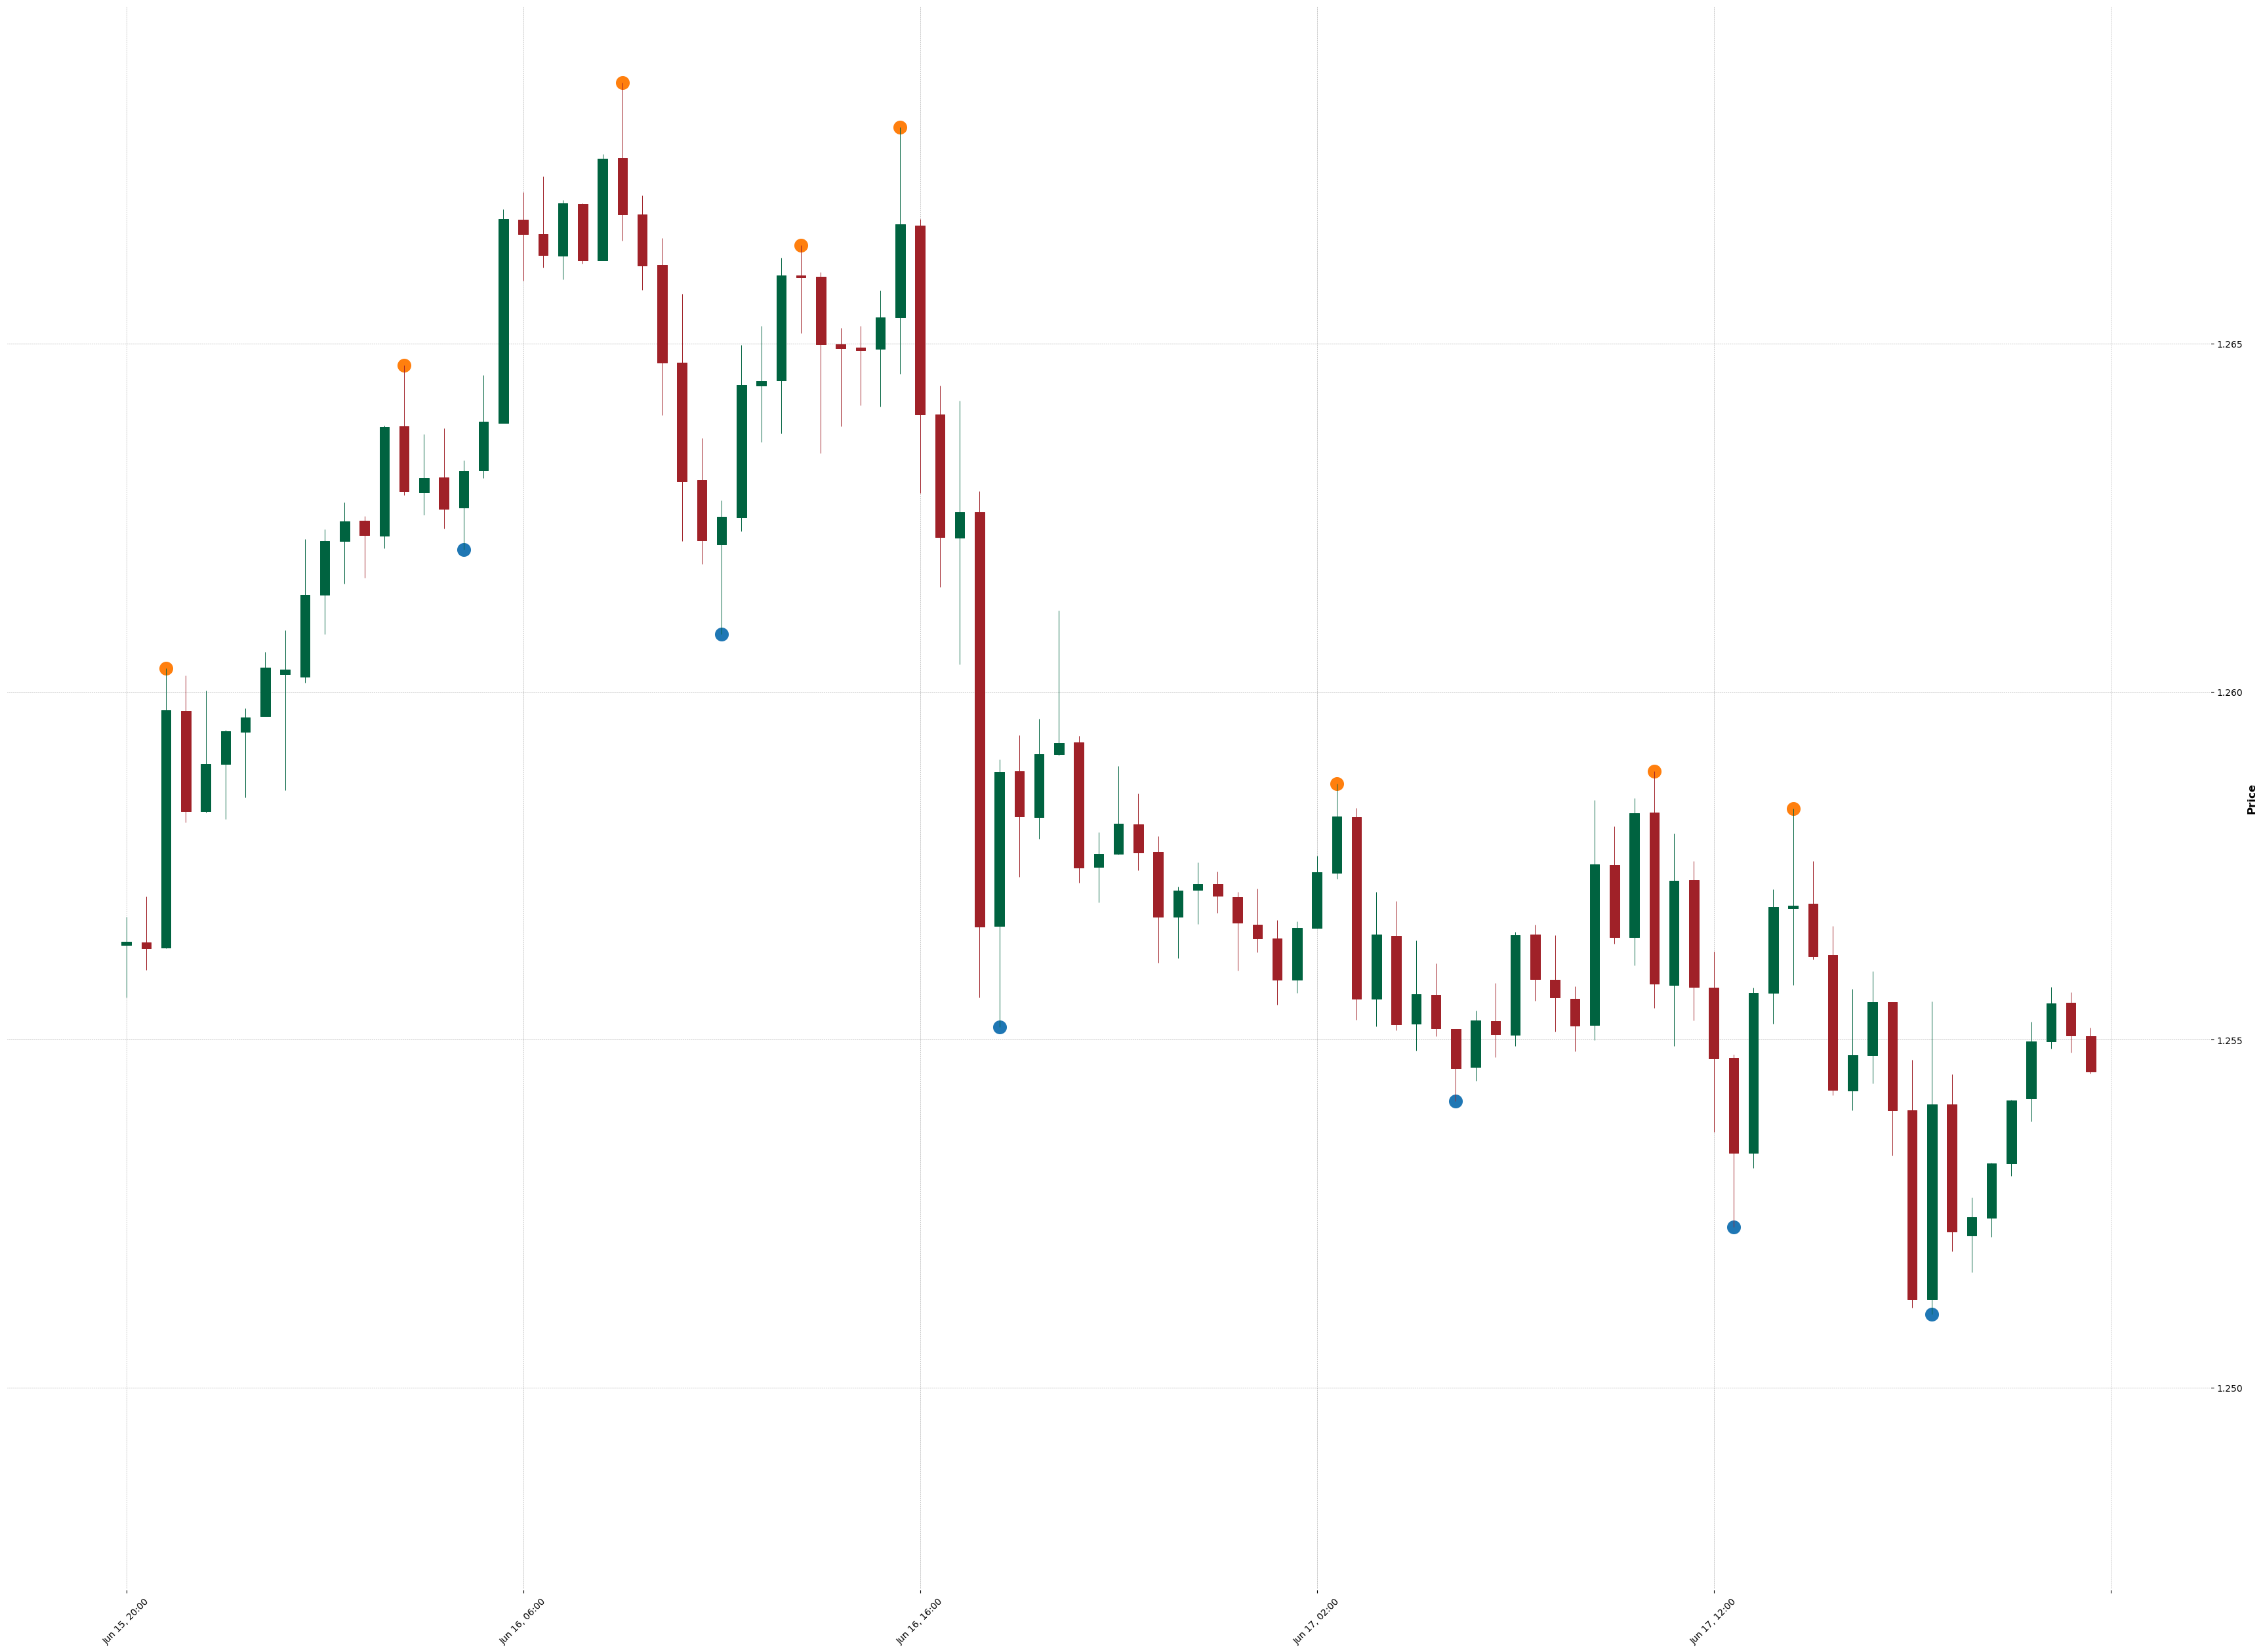

In [15]:
import mplfinance as mpl
adp= mpl.make_addplot(minMax[len(minMax)-100:], type= 'scatter', markersize= 200)
mpl.plot(data.iloc[data.shape[0]-100: data.shape[0],:], type= 'candle', style= 'charles', figscale= 6, addplot= adp)

In [36]:
isMaxid= 6
maxValueid= 7
isMinid= 8
minValueid= 9
Trendid= 10

In [17]:
# I want to see if after a high the trend becom downward or not so first we should examine the next high
def nextHigh(data, i):
    nextHighValue= data.iloc[i].loc['maxValue']
    for j in range(i+1, data.shape[0]):
        if data.iloc[j].loc['isMax']== True:
            nextHighValue= data.iloc[j].loc['maxValue']
            break
    return nextHighValue

def nextLow(data, i):
    nextLowValue= data.iloc[i].loc['minValue']
    for j in range(i+1, data.shape[0]):
        if data.iloc[j].loc['isMin']== True:
            nextLowValue= data.iloc[j].loc['minValue']
            break
    return nextLowValue

def previousHigh(data, i):
    previousHighValue= data.iloc[i].loc['maxValue']
    j= i-1
    while j>= 0:
        if data.iloc[j].loc['isMax']== True:
            previousHighValue= data.iloc[j].loc['maxValue']
            break
        j= j- 1
    return previousHighValue

def previousLow(data, i):
    previousLowValue= data.iloc[i].loc['minValue']
    j= i-1
    while j>= 0:
        if data.iloc[j].loc['isMin']== True:
            previousLowValue= data.iloc[j].loc['minValue']
            break
        j= j-1
    return previousLowValue


In [44]:
Trend= np.empty((data.shape[0], 1))
Trend[:]= np.nan
Trend= list(Trend)
data['Trend']= Trend

In [54]:
# Check the trend after an optimal point
def trendDetector(data, i):
    if data.iloc[i].loc['isMax'] == True:
        if ((nextHigh(data,i)<data.iloc[i].loc['maxValue']) and (nextLow(data,i)<previousLow(data,i))):
            data.iloc[i, Trendid]= 1
        else:
            data.iloc[i, Trendid]= 0
        print('Next High is', nextHigh(data, i))
        print('Next Low is', nextLow(data, i))
        print('Previous Low is', previousLow(data, i))
    
    if data.iloc[i, isMinid] == True:
        if (nextLow(data, i) > data.iloc[i, minValueid]) and(nextHigh(data, i) > previousHigh(data, i)):
            data.iloc[i, Trendid]= -1
        else:
            data.iloc[i, Trendid]= 0


In [46]:
%%time
for i in range(0, data.shape[0]):
    trendDetector(data, i)

Wall time: 1min 53s


In [55]:
trendDetector(data, 5574)

Next High is 1.29587
Next Low is 1.29902
Previous Low is 1.29364


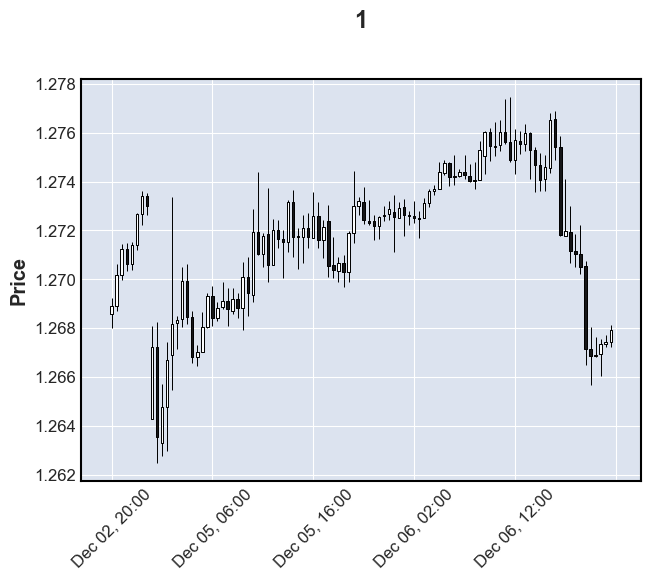

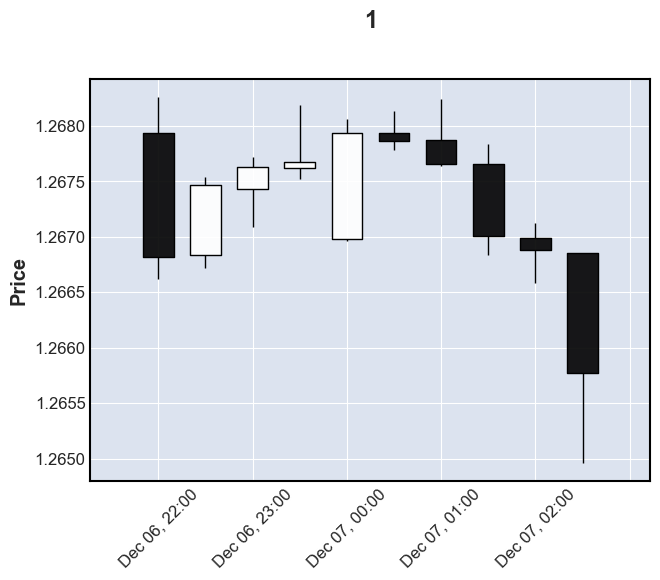

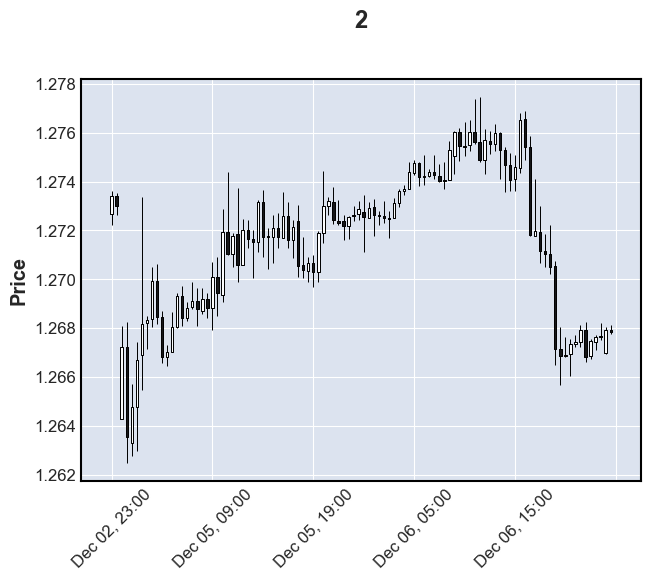

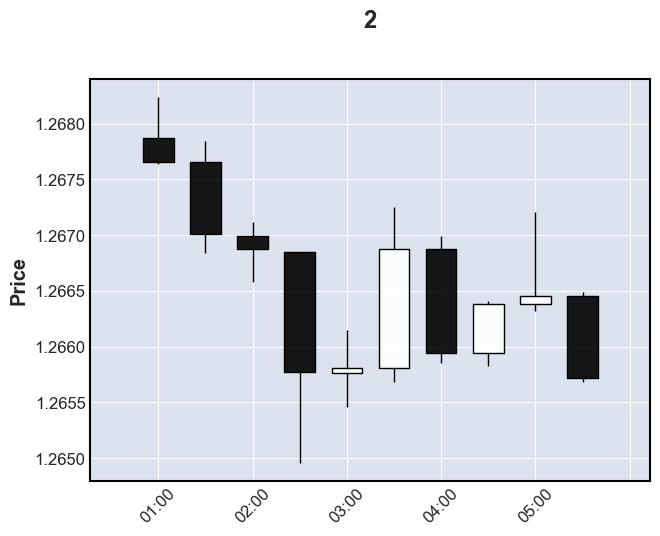

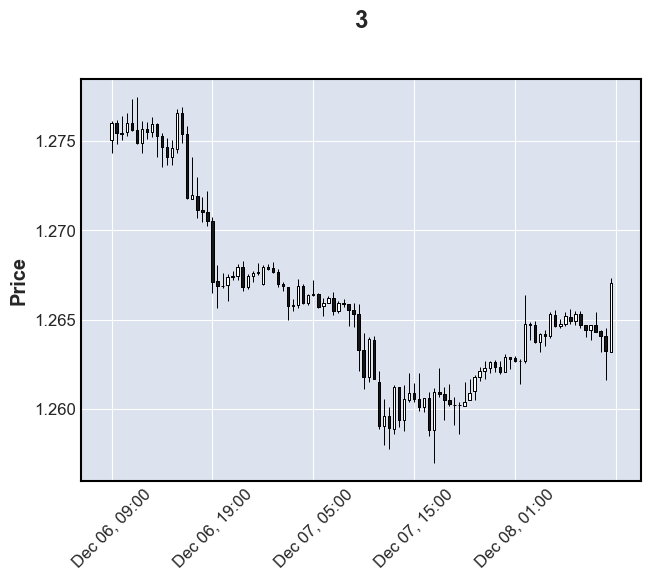

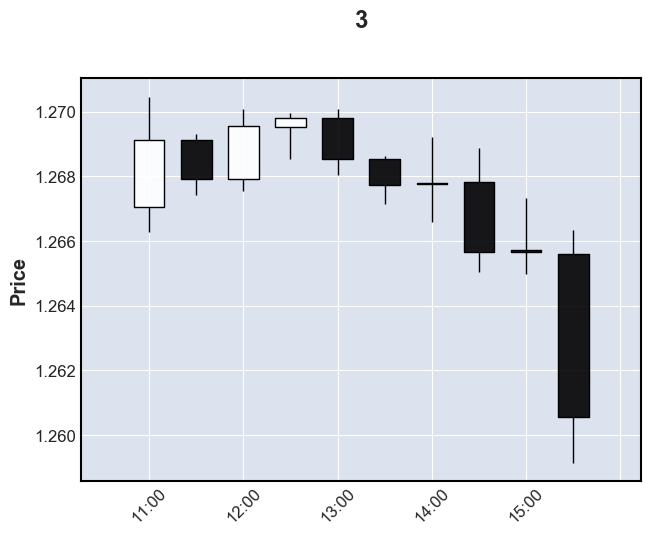

In [53]:
counter= 1
for i in range(100, 200):
    if data.iloc[i, trendid]== 1:
        mpl.plot(data.iloc[i-100:i, :], type= 'candle', title= str(counter))
        mpl.plot(data.iloc[i: i+10,:], type= 'candle', title= str(counter))
        counter= counter+ 1

In [50]:
pip install --upgrade mplfinance


  Attempting uninstall: mplfinance
    Found existing installation: mplfinance 0.12.5a2
    Uninstalling mplfinance-0.12.5a2:
      Successfully uninstalled mplfinance-0.12.5a2
